# Mean-Field AOA

This is a short introduction on how to apply mean-Field AOA to the Sherrington-Kirkpatrick model and the partition problem. 

For more details, consider our paper: https://arxiv.org/abs/2303.00329

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../src')
from meanfieldaoa import *

In [3]:
# schedule
p = 5000
τ = 0.5

# for this schedule, see Appendix A of https://arxiv.org/pdf/1907.02359.pdf
γ = τ * (np.arange(1, p + 1) - 1/2) / p
β = τ * (1 - np.arange(1, p + 1) / p)
β[p-1] = τ / (4 * p)

In [4]:
times = np.linspace(0, 1, p+1)

In [5]:
# number of spins
N = 5

## Sherrington-Kirkpatrick

In [6]:
# create random instance
np.random.seed(1)
J = np.random.normal(0, 1, size=(N, N)) / np.sqrt(N)
J = np.triu(J, k=1)
J = J + J.transpose()

In [7]:
np.around(J, decimals=2)

array([[ 0.  , -0.27, -0.24, -0.48,  0.39],
       [-0.27,  0.  , -0.34,  0.14, -0.11],
       [-0.24, -0.34,  0.  , -0.17,  0.51],
       [-0.48,  0.14, -0.17,  0.  ,  0.26],
       [ 0.39, -0.11,  0.51,  0.26,  0.  ]])

In [8]:
# fix final spin (i.e. leave it out)
S = np.array([[1., 0., 0.] for _ in range(N - 1)])
data = np.array([S for _ in range(p+1)])

# run one step at a time
for k in range(p):
    S = evolve(S, J, np.array([β[k]]), np.array([γ[k]]))
    data[k + 1] = S

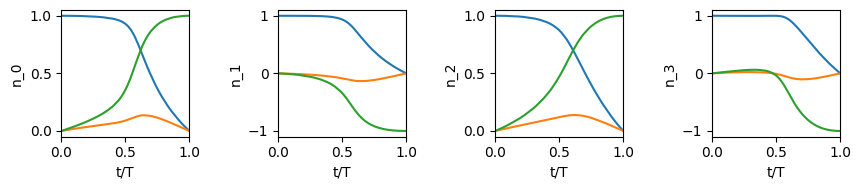

In [9]:
# plot x, y, and z of all spins 
plt.figure(figsize=((N - 1) * 2.2, 2))

for n in range(N - 1):
    plt.subplot(1, N - 1, n+1)
    plt.plot(times, data.T[0][n])
    plt.plot(times, data.T[1][n])
    plt.plot(times, data.T[2][n])
    plt.xlim(0, 1)
    plt.xlabel("t/T")
    plt.ylabel("n_" + str(n))

plt.tight_layout()

In [10]:
# restart and do full evolution
S = np.array([[1., 0., 0.] for _ in range(N - 1)])
S = evolve(S, J, β, γ)

# get solution from z components
solution(S[:, 2])

array([ 1., -1.,  1., -1.])

## Partition Problem

In [11]:
# create random instance
np.random.seed(3)
a = np.random.uniform(0, 1, size=N) 
a = np.sort(a)
J = -2 * np.outer(a.T, a)
np.fill_diagonal(J, 0.)

In [12]:
np.around(J, decimals=2)

array([[ 0.  , -0.3 , -0.32, -0.41, -0.52],
       [-0.3 ,  0.  , -0.56, -0.72, -0.91],
       [-0.32, -0.56,  0.  , -0.78, -0.98],
       [-0.41, -0.72, -0.78,  0.  , -1.26],
       [-0.52, -0.91, -0.98, -1.26,  0.  ]])

In [13]:
# fix final spin (i.e. leave it out)
S = np.array([[1., 0., 0.] for _ in range(N - 1)])
data = np.array([S for _ in range(p+1)])

# run one step at a time
for k in range(p):
    S = evolve(S, J, np.array([β[k]]), np.array([γ[k]]))
    data[k + 1] = S

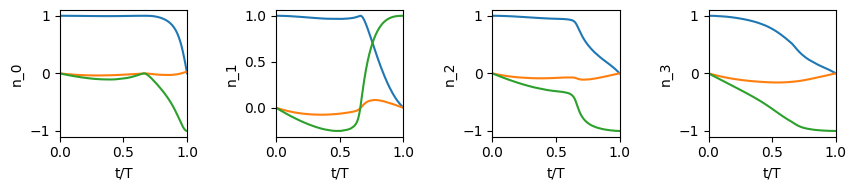

In [14]:
# plot x, y, and z of all spins 
plt.figure(figsize=((N - 1) * 2.2, 2))

for n in range(N - 1):
    plt.subplot(1, N - 1, n+1)
    plt.plot(times, data.T[0][n])
    plt.plot(times, data.T[1][n])
    plt.plot(times, data.T[2][n])
    plt.xlim(0, 1)
    plt.xlabel("t/T")
    plt.ylabel("n_" + str(n))

plt.tight_layout()

In [15]:
# restart and do full evolution
S = np.array([[1., 0., 0.] for _ in range(N - 1)])
S = evolve(S, J, β, γ)

# get solution from z components
solution(S[:, 2])

array([-1.,  1., -1., -1.])